# Name: Sushilkumar Patil

# Task 2 : Prediction using Decision Tree  Algorithm

Aim: Create the Decision Tree classifier and visualize it graphically.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

### Importing data

In [2]:
d=pd.read_csv('Iris.csv')
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Only One Column is Object Type, all others are of float types

In [4]:
d.shape

(150, 6)

### Dropping Useless Variables

In [5]:
d.drop('Id',inplace=True,axis=1)

In [6]:
d.shape

(150, 5)

### Checking for Null values

In [7]:
d.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that there are no null values present in given data

### Checking for Duplicates and Dropping if any

In [8]:
d.drop_duplicates(inplace=True)
d.shape

(147, 5)

Dimension of data has changed from 150 rows to 147 as we have dropped duplicate records

### Checking for Outliers

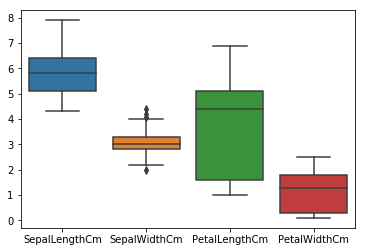

In [9]:
sns.boxplot(data=d)

From the boxplot we can see that 'SepalWidthCm' has Outliers. We remove the outliers by using Capping and Flooring Method

In [10]:
for col in d.columns[:-1]:
    percentiles = d[col].quantile([0.01,0.99]).values
    d[col][d[col] <= percentiles[0]] = percentiles[0]
    d[col][d[col] >= percentiles[1]] = percentiles[1]

C:\Users\sanjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sanjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


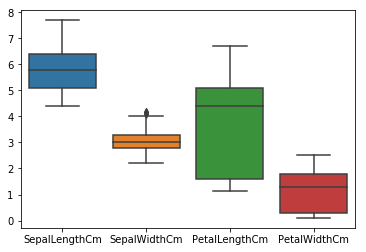

In [11]:
sns.boxplot(data=d)

### Data Transformation

In [14]:
d.skew()

SepalLengthCm    0.280194
SepalWidthCm     0.284448
PetalLengthCm   -0.297525
PetalWidthCm    -0.113479
dtype: float64

In [15]:
d.SepalLengthCm=np.log(d.SepalLengthCm)
d.SepalWidthCm=np.sqrt(d.SepalWidthCm)
d.PetalLengthCm=np.square(d.PetalLengthCm)

In [16]:
d.skew()

SepalLengthCm    0.016720
SepalWidthCm     0.093529
PetalLengthCm    0.160518
PetalWidthCm    -0.113479
dtype: float64

### Data Visualisation

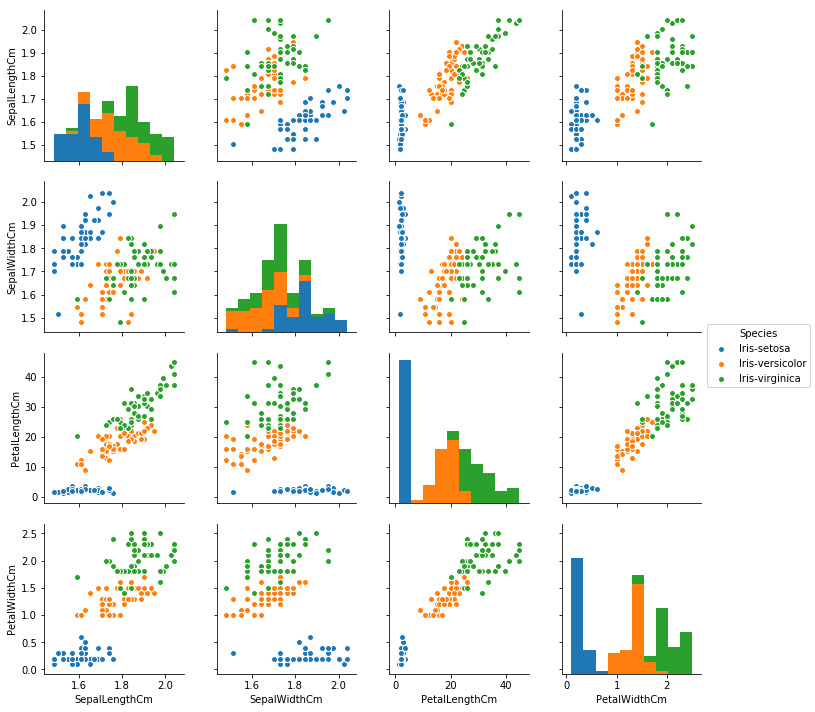

In [17]:
sns.pairplot(d,hue='Species')

### Preparing Data

In [18]:
y=d['Species']
X=d.drop('Species',axis=1)

### Training the Model

In [19]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier()

### Visualizing Decision Tree

In [62]:
features=list(d.columns[0:-1])

In [63]:
targets=d.columns[-1]
targets

'Species'

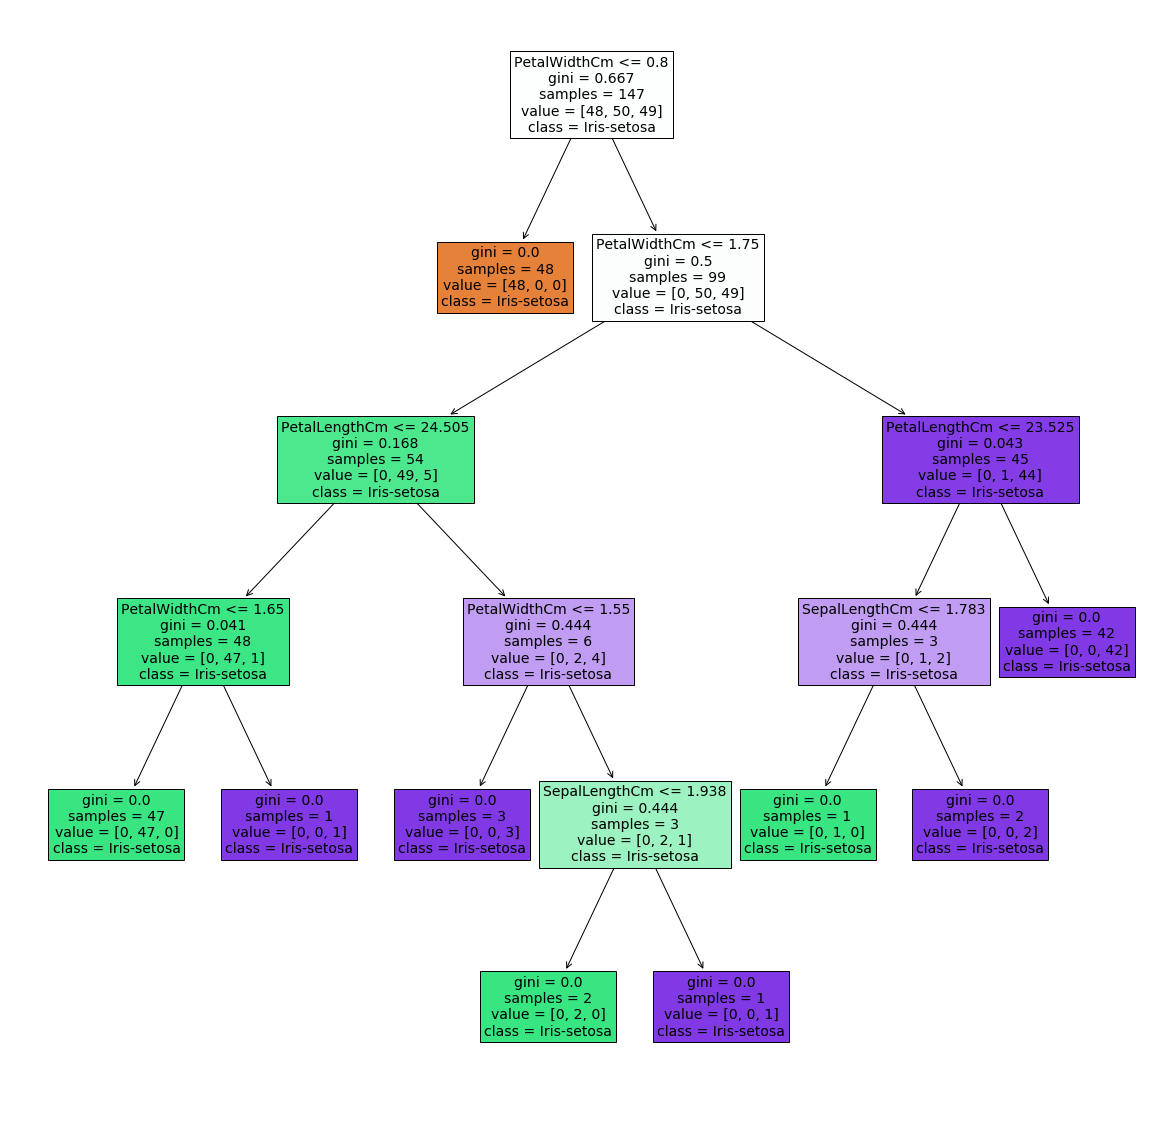

In [64]:
# visualization of decision tree classifier

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
n =plot_tree(dtree,feature_names = features,
           class_names = y,
           filled = True, fontsize= 14)